In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./tt/train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data = data[['Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [5]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [6]:
data.fillna(0, inplace=True)

In [7]:
data['Sex'] =[1 if x=='male' else 0 for x in data.Sex]

In [8]:
data['p1'] = np.array(data['Pclass'] == 1).astype(np.int32)
data['p2'] = np.array(data['Pclass'] == 2).astype(np.int32)
data['p3'] = np.array(data['Pclass'] == 3).astype(np.int32)

In [9]:
del data['Pclass']

In [10]:
data.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [11]:
data['e1'] = np.array(data['Embarked'] == 'S').astype(np.int32)
data['e2'] = np.array(data['Embarked'] == 'C').astype(np.int32)
data['e3'] = np.array(data['Embarked'] == 'Q').astype(np.int32)

In [12]:
del data['Embarked']

In [13]:
data.values.dtype

dtype('float64')

In [14]:
data.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'p1', 'p2', 'p3',
       'e1', 'e2', 'e3'],
      dtype='object')

In [15]:
data_train = data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'p1', 'p2', 'p3',
       'e1', 'e2', 'e3']].values

In [16]:
data_target = data['Survived'].values.reshape(len(data),1)

In [18]:
np.shape(data_train),np.shape(data_target)

((891, 11), (891, 1))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data_train, data_target, test_size = 0.2)

In [21]:
x_train.shape, x_test.shape

((712, 11), (179, 11))

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
model.score(x_test, y_test)

0.7932960893854749

In [26]:
model.score(x_train, y_train)

0.9845505617977528

In [28]:
def m_score(depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score, test_score
    

In [27]:
depths = range(2, 15)

In [29]:
scores = [m_score(depth) for depth in depths]

In [30]:
scores

[(0.7921348314606742, 0.7932960893854749),
 (0.8258426966292135, 0.8547486033519553),
 (0.8412921348314607, 0.8491620111731844),
 (0.8469101123595506, 0.8435754189944135),
 (0.8595505617977528, 0.8435754189944135),
 (0.8623595505617978, 0.8435754189944135),
 (0.8735955056179775, 0.8435754189944135),
 (0.8876404494382022, 0.8435754189944135),
 (0.9087078651685393, 0.8603351955307262),
 (0.9199438202247191, 0.8491620111731844),
 (0.9311797752808989, 0.8268156424581006),
 (0.9382022471910112, 0.8156424581005587),
 (0.9452247191011236, 0.8379888268156425)]

In [31]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

In [32]:
import matplotlib.pyplot as plt

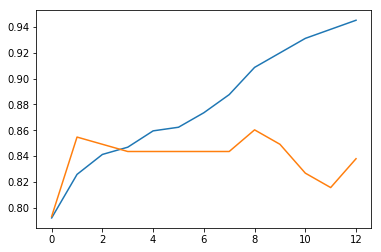

In [33]:
plt.plot(train_s)
plt.plot(test_s)

In [34]:
def m_score(value):
    model = DecisionTreeClassifier(min_impurity_split=value)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_scroe = model.score(x_test, y_test)
    return train_score, test_scroe

In [35]:
values = np.linspace(0, 0.5, 50)

In [36]:
scores = [m_score(value) for value in values]

In [37]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

In [38]:
best_index = np.argmax(test_s)

In [39]:
best_score = test_s[best_index]
best_value = values[best_index]

In [40]:
best_score, best_value

(0.8659217877094972, 0.19387755102040816)

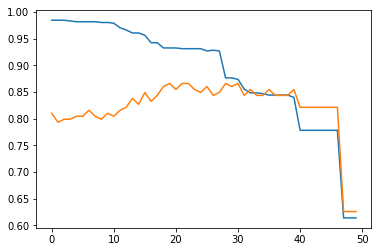

In [41]:
plt.plot(train_s)
plt.plot(test_s)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
values = np.linspace(0, 0.5, 50)
depths = range(2, 15)

In [46]:
param_grid = {'max_depth':depths, 'min_impurity_split':values}

In [47]:
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [48]:
model.fit(data_train, data_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 15), 'min_impurity_split': array([0.     , 0.0102 , 0.02041, 0.03061, 0.04082, 0.05102, 0.06122,
       0.07143, 0.08163, 0.09184, 0.10204, 0.11224, 0.12245, 0.13265,
       0.14286, 0.15306, 0.16327, 0.17347, 0.18367, 0.19388, 0.20408,
       0.21429, 0.22449, 0.23...16, 0.41837,
       0.42857, 0.43878, 0.44898, 0.45918, 0.46939, 0.47959, 0.4898 ,
       0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
model.best_params_

{'max_depth': 9, 'min_impurity_split': 0.21428571428571427}

In [50]:
model.best_score_

0.8316498316498316